In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns


%matplotlib inline

In [2]:
pd.options.display.max_columns=100

In [3]:
wine = pd.read_csv('white_wine.csv')
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
2,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
3,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
4,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
5,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
6,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
7,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6
8,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,5
9,8.6,0.23,0.40,4.20,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3901 entries, 0 to 3900
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3901 non-null   float64
 1   volatile acidity      3901 non-null   float64
 2   citric acid           3901 non-null   float64
 3   residual sugar        3901 non-null   float64
 4   chlorides             3901 non-null   float64
 5   free sulfur dioxide   3901 non-null   float64
 6   total sulfur dioxide  3901 non-null   float64
 7   density               3901 non-null   float64
 8   pH                    3901 non-null   float64
 9   sulphates             3901 non-null   float64
 10  alcohol               3901 non-null   float64
 11  quality               3901 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 365.8 KB


In [5]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wine['quality'].value_counts()

6    1750
5    1160
7     701
8     140
4     130
3      16
9       4
Name: quality, dtype: int64

In [7]:
wine['quality']

0       6
1       6
2       6
3       6
4       6
       ..
3896    6
3897    6
3898    5
3899    7
3900    6
Name: quality, Length: 3901, dtype: int64

In [8]:
wine['quality_label']=wine['quality'].apply(lambda q: 'low' if q<=5 else 'medium' if q<=7 else 'high')
wine['quality_label'] = pd.Categorical(wine['quality_label'], categories = ['low','medium','high'])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
2,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,medium


In [9]:
attributes = wine.columns[:-1]
round(wine[attributes].describe(),2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3901.00,3901.00,3901.00,3901.00,3901.00,3901.00,3901.00,3901.00,3901.00,3901.00,3901.00,3901.00
mean,6.86,0.28,0.33,6.37,0.05,35.14,138.21,0.99,3.19,0.49,10.51,5.88
std,0.85,0.10,0.12,5.09,0.02,16.79,42.55,0.00,0.15,0.11,1.23,0.89
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00,3.00
25%,6.30,0.21,0.27,1.70,0.04,23.00,108.00,0.99,3.08,0.41,9.40,5.00
50%,6.80,0.26,0.32,5.15,0.04,34.00,134.00,0.99,3.18,0.47,10.40,6.00
75%,7.30,0.32,0.38,9.80,0.05,45.00,167.00,1.00,3.28,0.55,11.40,6.00
max,14.20,1.00,1.66,65.80,0.30,289.00,440.00,1.04,3.82,1.08,14.20,9.00


In [10]:
ls = round(wine[wine['quality_label']=='low'][attributes].describe(),2)
ms = round(wine[wine['quality_label']=='medium'][attributes].describe(),2)
hs = round(wine[wine['quality_label']=='high'][attributes].describe(),2)

pd.concat([ls, ms, hs], axis=1, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine'])

Low Quality Wine                                                        \
         fixed acidity volatile acidity citric acid residual sugar chlorides   
count          1306.00          1306.00     1306.00        1306.00   1306.00   
mean              6.96             0.31        0.33           6.95      0.05   
std               0.89             0.11        0.14           5.26      0.03   
min               4.20             0.10        0.00           0.60      0.01   
25%               6.40             0.24        0.24           1.66      0.04   
50%               6.80             0.29        0.31           6.50      0.05   
75%               7.50             0.35        0.41          10.90      0.05   
max              10.30             1.00        0.88          23.50      0.30   

                                                                            \
      free sulfur dioxide total sulfur dioxide  density       pH sulphates   
count             1306.00              1306.00  1306.00  1306.00   1306.00   
mean                35.17               148.44     1.00     3.17      0.48   
std                 20.15                47.04     0.00     0.14      0.10   
min                  2.00                 9.00     0.99     2.79      0.25   
25%                 20.00               117.00     0.99     3.08      0.41   
50%                 34.00               148.00     1.00     3.16      0.47   
75%                 48.00               182.00     1.00     3.24      0.53   
max                289.00               440.00     1.00     3.77      0.88   

                        Medium Quality Wine                               \
       alcohol  quality       fixed acidity volatile acidity citric acid   
count  1306.00  1306.00             2451.00          2451.00     2451.00   
mean      9.85     4.88                6.81             0.26        0.33   
std       0.88     0.37                0.83             0.09        0.11   
min       8.00     3.00                3.80             0.08        0.00   
25%       9.20     5.00                6.30             0.20        0.27   
50%       9.60     5.00                6.80             0.25        0.32   
75%      10.40     5.00                7.30             0.31        0.38   
max      13.60     5.00               14.20             0.96        1.66   

                                                                         \
      residual sugar chlorides free sulfur dioxide total sulfur dioxide   
count        2451.00   2451.00             2451.00              2451.00   
mean            6.09      0.04               35.03               133.49   
std             5.01      0.02               14.69                39.42   
min             0.70      0.01                3.00                18.00   
25%             1.70      0.03               25.00               105.00   
50%             4.80      0.04               34.00               128.00   
75%             9.30      0.05               44.00               159.00   
max            65.80      0.26              112.00               294.00   

                                                    High Quality Wine  \
       density       pH sulphates  alcohol  quality     fixed acidity   
count  2451.00  2451.00   2451.00  2451.00  2451.00            144.00   
mean      0.99     3.19      0.49    10.80     6.29              6.68   
std       0.00     0.15      0.12     1.23     0.45              0.83   
min       0.99     2.72      0.22     8.50     6.00              3.90   
25%       0.99     3.09      0.41     9.80     6.00              6.20   
50%       0.99     3.19      0.48    10.80     6.00              6.80   
75%       1.00     3.29      0.56    11.80     7.00              7.30   
max       1.04     3.82      1.08    14.20     7.00              9.10   

                                                             \
      volatile acidity citric acid residual sugar chlorides   
count           144.00      144.00         144.00    14

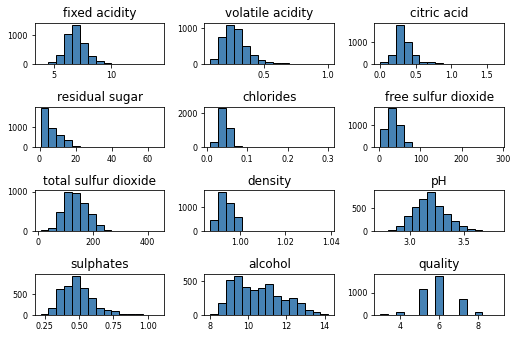

In [11]:
wine.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)

# command to give space b/t diff. plots 
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

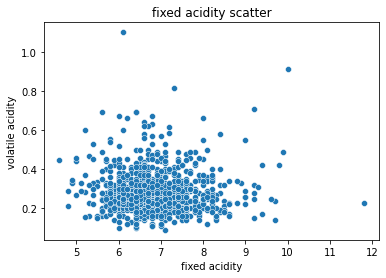

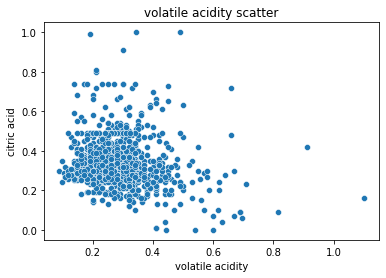

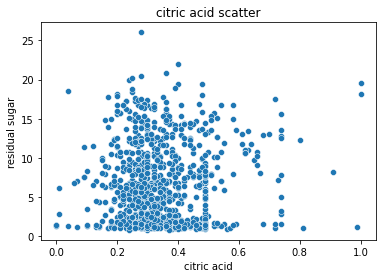

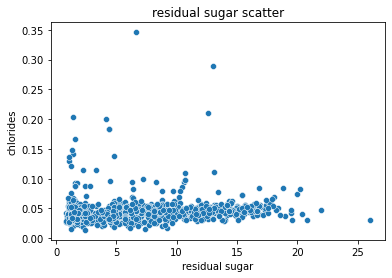

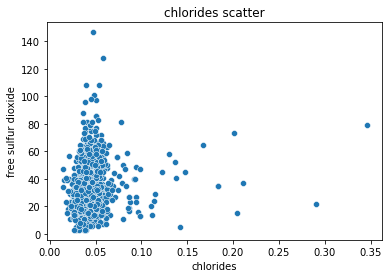

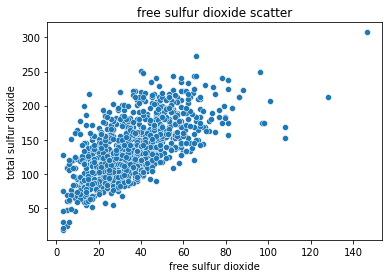

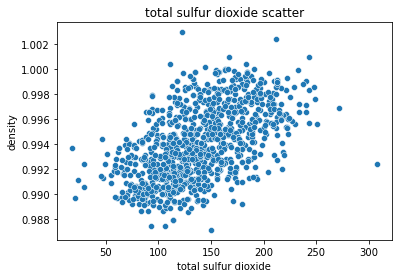

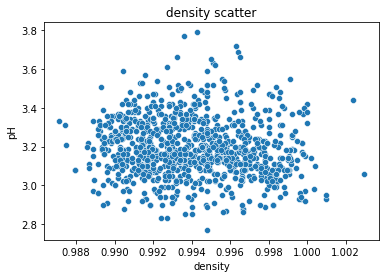

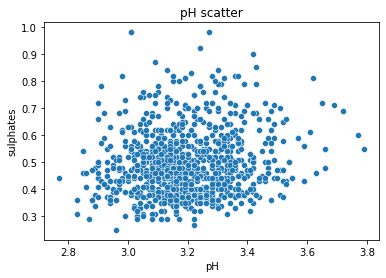

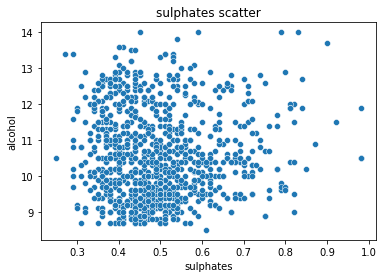

In [4]:
unknown = pd.read_csv("unknowns.csv")

%matplotlib inline
for i in range(len(unknown.columns)-1):
    plt.figure()
    plt.title("{} scatter".format(unknown.columns[i]))
    sns.scatterplot(x=unknown.columns[i],y=unknown.columns[i+1],data=unknown)
    plt.xlabel(unknown.columns[i])
    plt.ylabel(unknown.columns[i+1])

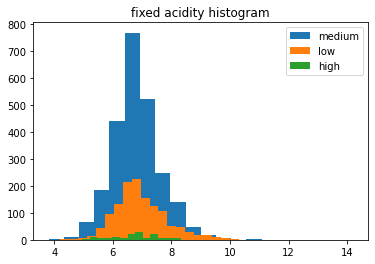

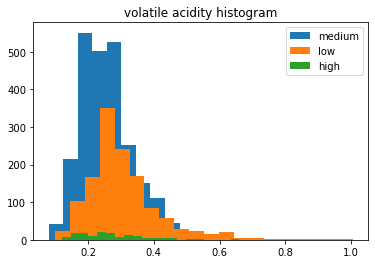

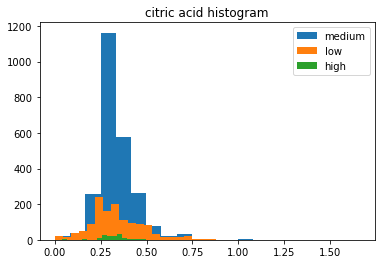

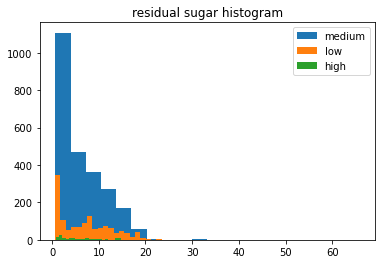

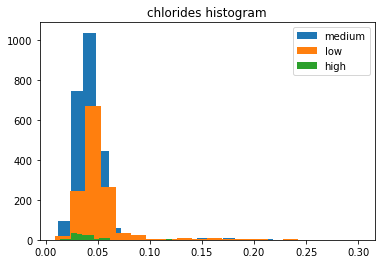

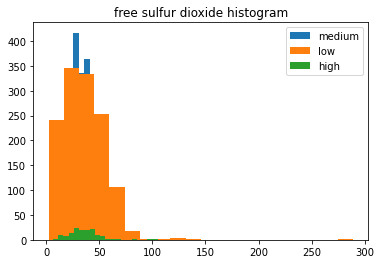

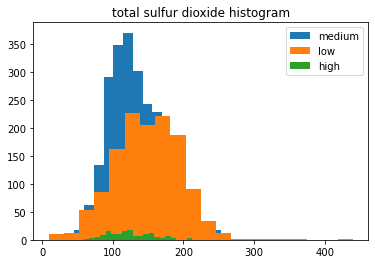

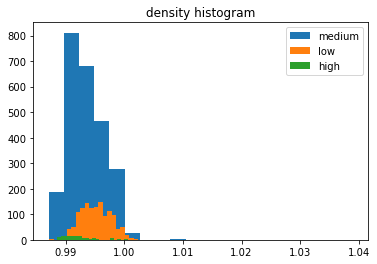

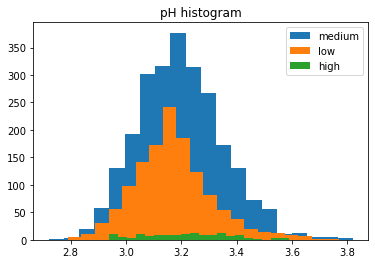

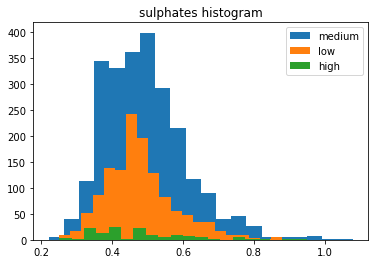

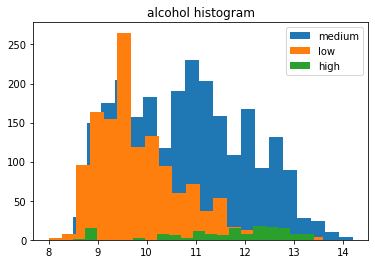

In [18]:
%matplotlib inline
lwine = wine[wine['quality_label']=='low']
mwine = wine[wine['quality_label']=='medium']
hwine = wine[wine['quality_label']=='high']

for i in range(len(wine.columns)-2):
    plt.figure()
    plt.title("{} histogram".format(wine.columns[i]))
    plt.hist(mwine[wine.columns[i]],bins=20,label = "medium")
    plt.hist(lwine[wine.columns[i]],bins=20,label = "low")
    plt.hist(hwine[wine.columns[i]],bins=20,label = "high")
    plt.legend()

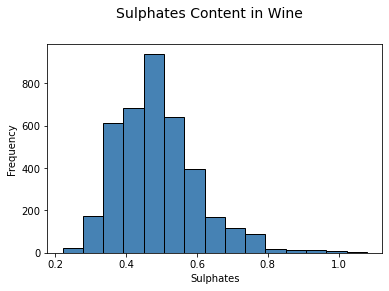

In [16]:
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency") 

freq, bins, patches = ax.hist(wine['sulphates'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)

<AxesSubplot:xlabel='Sulphates', ylabel='Density'>

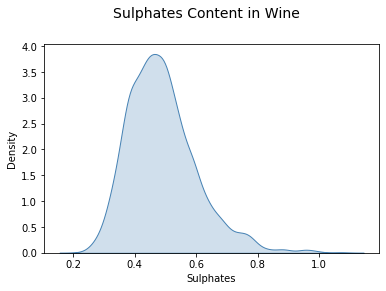

In [33]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Density") 
sns.kdeplot(wine['sulphates'], ax=ax1, shade=True, color='steelblue')

In [18]:
w_q=wine['quality'].value_counts()   # most of the wines are having quality 6
w_q

6    1750
5    1160
7     701
8     140
4     130
3      16
9       4
Name: quality, dtype: int64

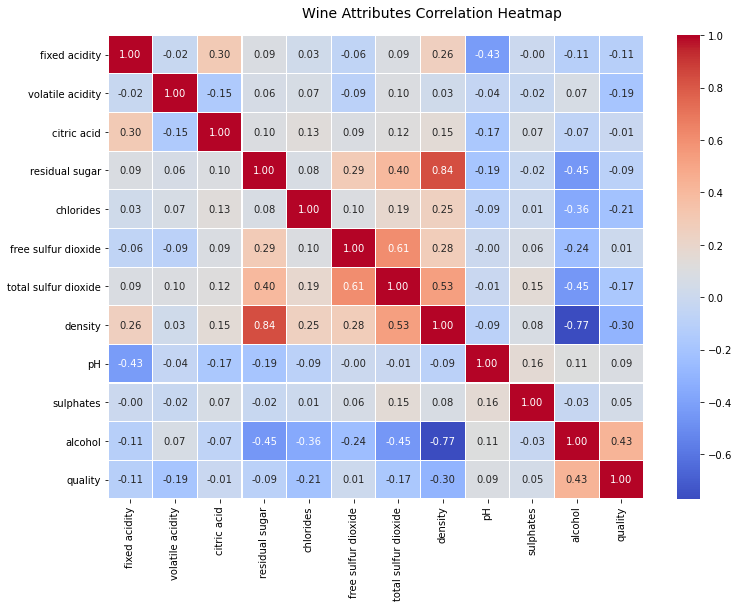

In [19]:
f, ax = plt.subplots(figsize=(12, 8))
corr = wine.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

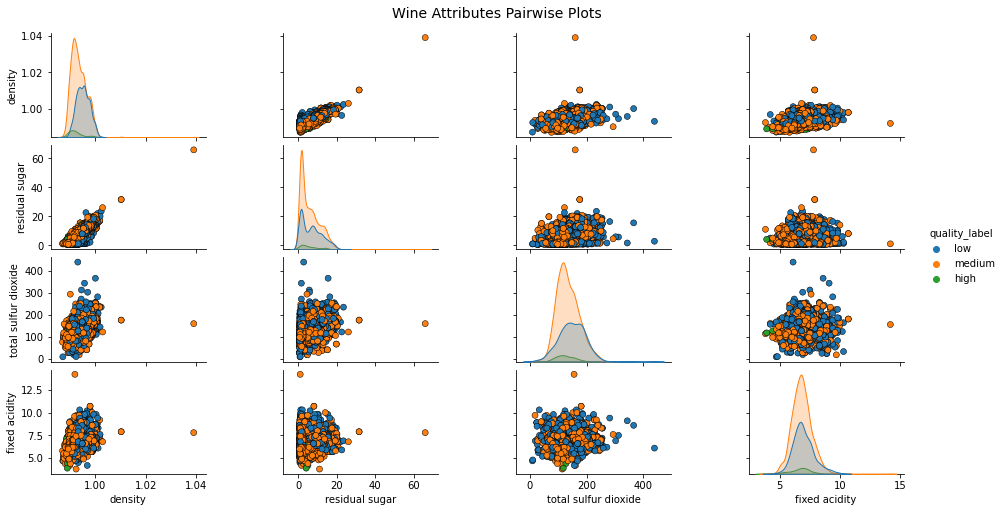

In [20]:
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'quality_label']
pp = sns.pairplot(wine[cols], height=1.8, hue = 'quality_label' , aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig  
fig.subplots_adjust(top=0.93, wspace=0.5)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

## Multi-Dimensional EDA help from this kaggle notebook:

https://www.kaggle.com/piyushagni5/multi-dimensional-data-visualization-eda/notebook#Import-necessary-dependencies

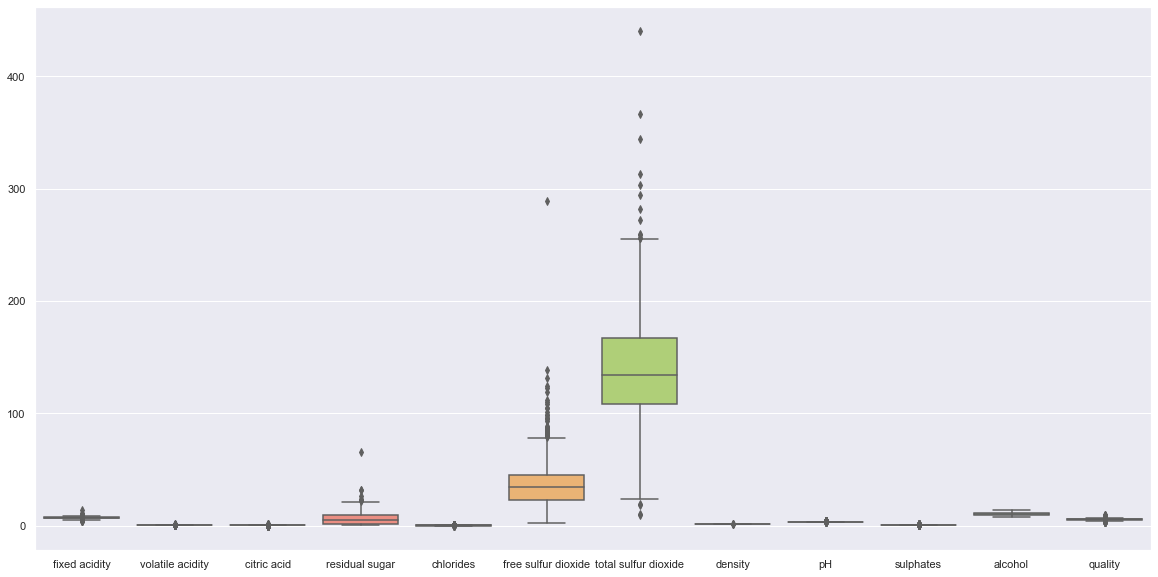

In [21]:
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=wine,palette="Set3")
plt.show()

Text(0.5, 1.0, 'Wine Sulphates - Alcohol Content')

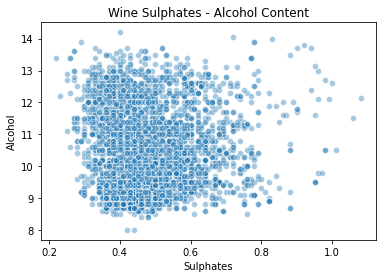

In [73]:
plt.scatter(wine['sulphates'], wine['alcohol'],
            alpha=0.4, edgecolors='w')

plt.xlabel('Sulphates')
plt.ylabel('Alcohol')
plt.title('Wine Sulphates - Alcohol Content')

C:\Users\alex\miniconda3\envs\ece157\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


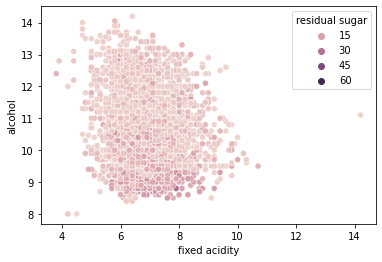

In [84]:
sc = sns.scatterplot(wine['fixed acidity'], wine['alcohol'], 
                hue=wine['residual sugar'], alpha=0.9)

C:\Users\alex\miniconda3\envs\ece157\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\alex\miniconda3\envs\ece157\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


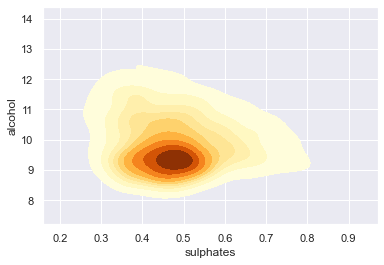

In [22]:
ax = sns.kdeplot(lwine['sulphates'], lwine['alcohol'],
                  cmap="YlOrBr", shade=True, shade_lowest=False)

C:\Users\alex\miniconda3\envs\ece157\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\alex\miniconda3\envs\ece157\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


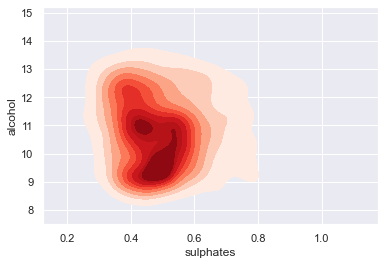

In [23]:
ax = sns.kdeplot(mwine['sulphates'], mwine['alcohol'],
                  cmap="Reds", shade=True, shade_lowest=False)

C:\Users\alex\miniconda3\envs\ece157\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\alex\miniconda3\envs\ece157\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


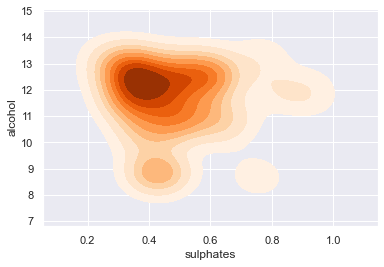

In [24]:
ax = sns.kdeplot(hwine['sulphates'], hwine['alcohol'],
                 cmap ="Oranges", shade=True, shade_lowest=False)

Text(0.5, 0, 'Fixed Acidity')

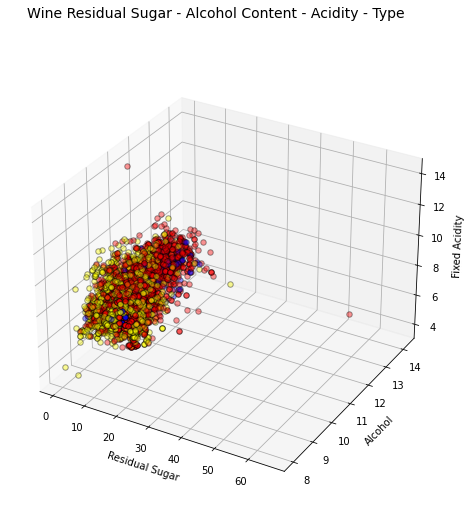

In [96]:
fig = plt.figure(figsize = (10,8))
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Type', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(wine['residual sugar'])
ys = list(wine['alcohol'])
zs = list(wine['fixed acidity'])

data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['yellow' if wt == 'low' else 'red' if wt == 'medium' else 'blue'
          for wt in list(wine['quality_label'])]
data_points[0]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z,
               c=color,
               alpha=0.4,
               s=30,
               edgecolors='black'          # to remove edgecolors comment this parameter
              )

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

Text(0.5, 1.05, 'Wine Alcohol Content - Fixed Acidity - Residual Sugar - Type')

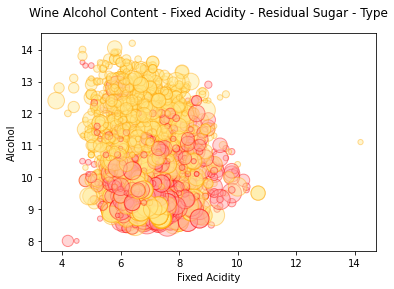

In [97]:
size = wine['residual sugar']*25
fill_colors = ['#FF9999' if wt=='low' else '#FFE888' for wt in list(wine['quality_label'])]
edge_colors = ['red' if wt=='low' else 'orange' for wt in list(wine['quality_label'])]

plt.scatter(wine['fixed acidity'], wine['alcohol'], s=size, 
            alpha=0.4, color=fill_colors, edgecolors=edge_colors)

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar - Type',y=1.05)

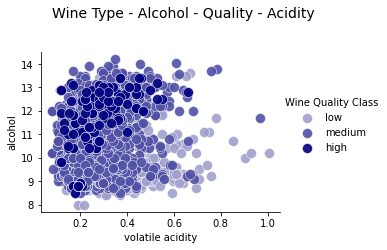

In [100]:
g = sns.FacetGrid(wine , hue='quality_label', hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('navy', 4)[1:])
g.map(plt.scatter, "volatile acidity", "alcohol", alpha=0.9, 
      edgecolor='white', linewidth=0.5, s=100)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Alcohol - Quality - Acidity', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

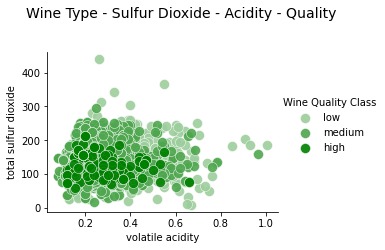

In [101]:
g = sns.FacetGrid(wine, hue='quality_label', hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('green', 4)[1:])
g.map(plt.scatter, "volatile acidity", "total sulfur dioxide", alpha=0.9, 
      edgecolor='white', linewidth=0.5, s=100)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Acidity - Quality', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

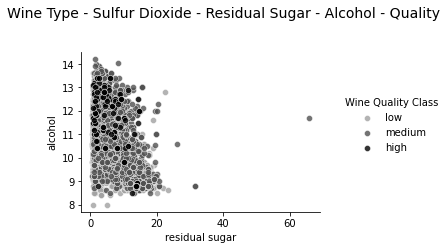

In [102]:
g = sns.FacetGrid(wine, hue='quality_label', hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('black', 4)[1:])

g.map(plt.scatter, "residual sugar", "alcohol", alpha=0.8, 
      edgecolor='white', linewidth=0.5, 
      #s=np.ravel(wines['total sulfur dioxide']*2)
     )

fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

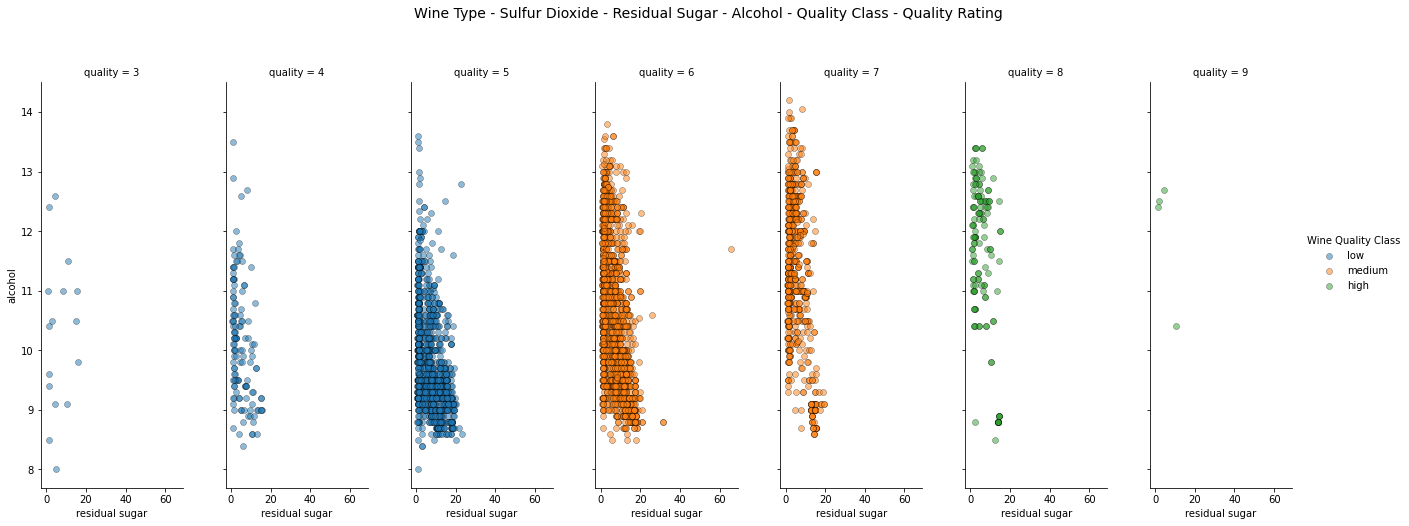

In [103]:
g = sns.FacetGrid(wine, col="quality", hue='quality_label', size=4)
g.map(plt.scatter,  "residual sugar", "alcohol", alpha=0.5, 
      edgecolor='k', linewidth=0.5, 
      #s=wines['total sulfur dioxide']*2
     )
fig = g.fig 
fig.set_size_inches(18, 8)
fig.subplots_adjust(top=0.85, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality Class - Quality Rating', fontsize=14)
l = g.add_legend(title='Wine Quality Class')